In [1]:
#Filename: BankChurners.ipynb
#Author: Solange Adelle
#Objective: To analyze the BankChurners data set for predicting which customers leave bank
from imblearn.over_sampling import SMOTE
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:blue"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from sklearn.model_selection import KFold

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

In [112]:
from sklearn import tree

In [5]:
# reading the CSV file into pandas dataframe
bk_cnr_df = pd.read_csv("BankChurners.csv")  

In [6]:
bk_cnr_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
bk_cnr_df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

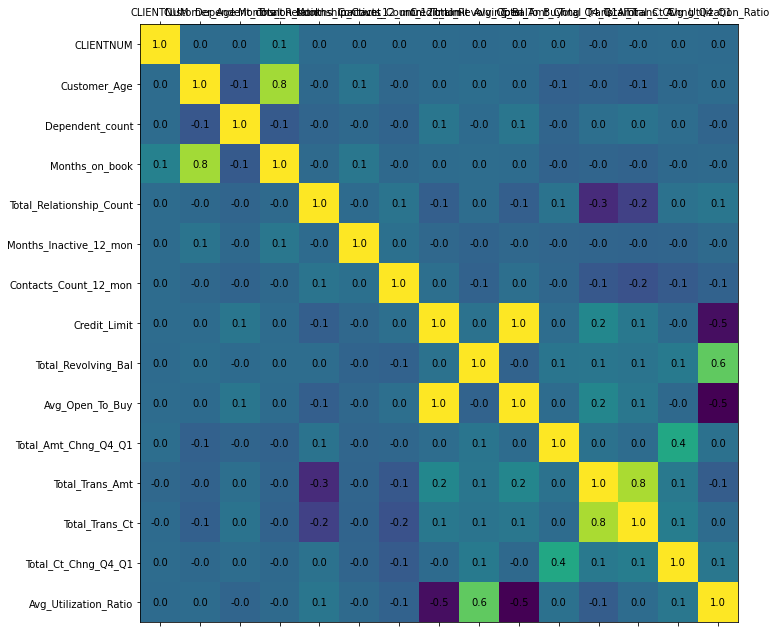

In [9]:
#
plot_corr(bk_cnr_df)

In [ ]:
#bk_cnr_df.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [ ]:
#TO SEE NUMBER OF CLIENTS
bk_cnr_df.info()

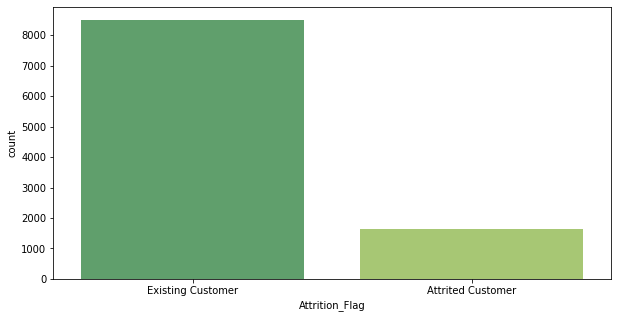

In [10]:
#
plt.figure(figsize=(10,5))
ax= sns.countplot(bk_cnr_df["Attrition_Flag"], palette="summer")
#perc_on_bar(ax, data["Attrition_Flag"])

In [11]:
#Checking for missing (null) values
bk_cnr_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
#THERE ARE 1627 ATTRITED CUSTOMERS
df_attrited, df_existing = [x for _, x in bk_cnr_df.groupby(bk_cnr_df['Attrition_Flag'] == "Existing Customer")]
df_attrited.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [105]:
#THERE ARE 8500 EXISTING CUSTOMERS
df_existing.describe()

In [13]:
df_attrited.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [14]:
#Make List of Categorical
# Get list of categorical variables
#https://www.kaggle.com/alexisbcook/categorical-variables
s = (bk_cnr_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [15]:
#plotting only the continuous
continuous_df = bk_cnr_df.drop(object_cols, axis=1)
disc=['Contacts_Count_12_mon','Dependent_count','Months_Inactive_12_mon','Total_Relationship_Count']
continuous_df = continuous_df.drop(disc,axis=1)
continuous_cols = list(continuous_df.columns)

In [16]:
print(continuous_cols)

['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


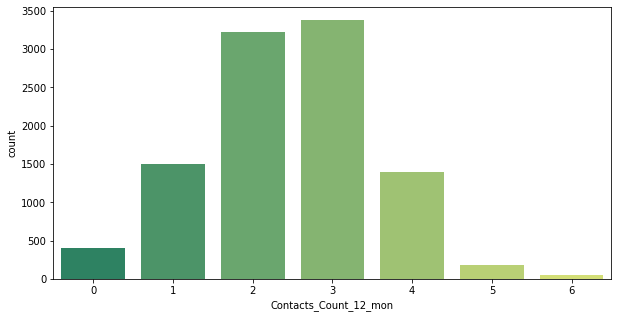

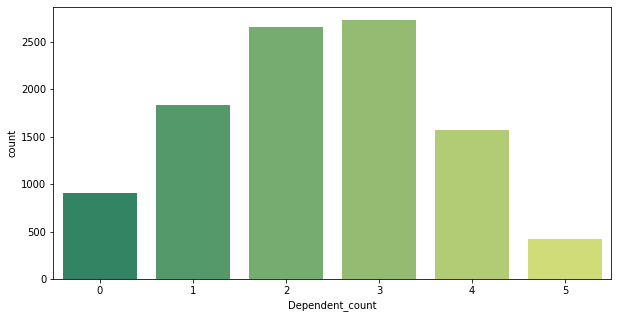

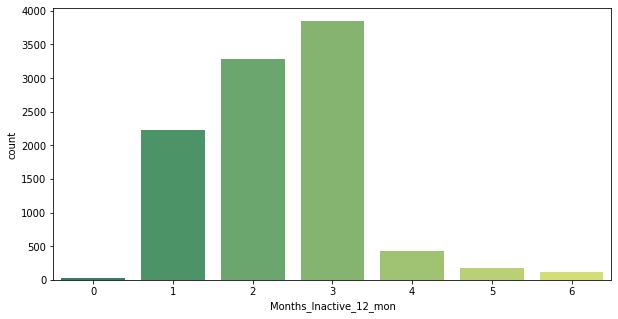

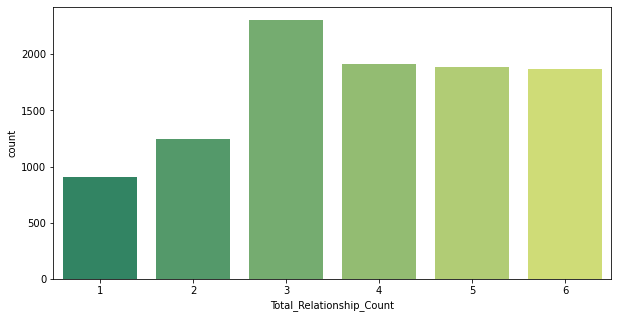

In [17]:
#plotting the discrete
for _ in disc:
    plt.figure(figsize=(10,5))
    ax= sns.countplot(bk_cnr_df[_], palette="summer")

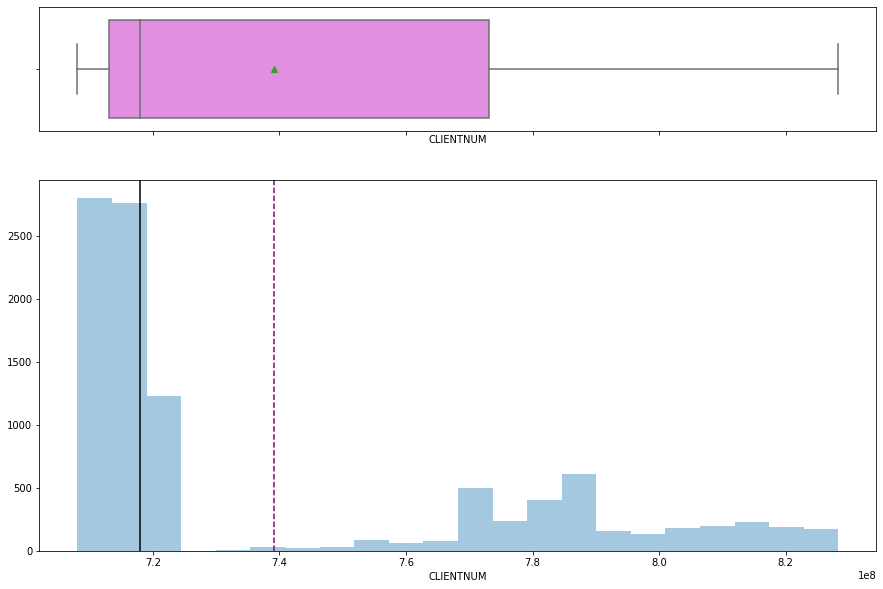

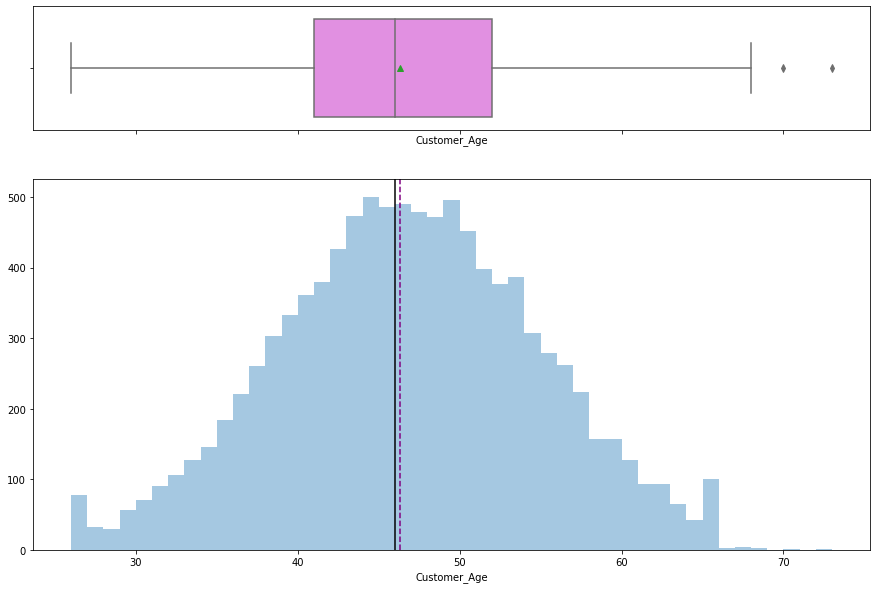

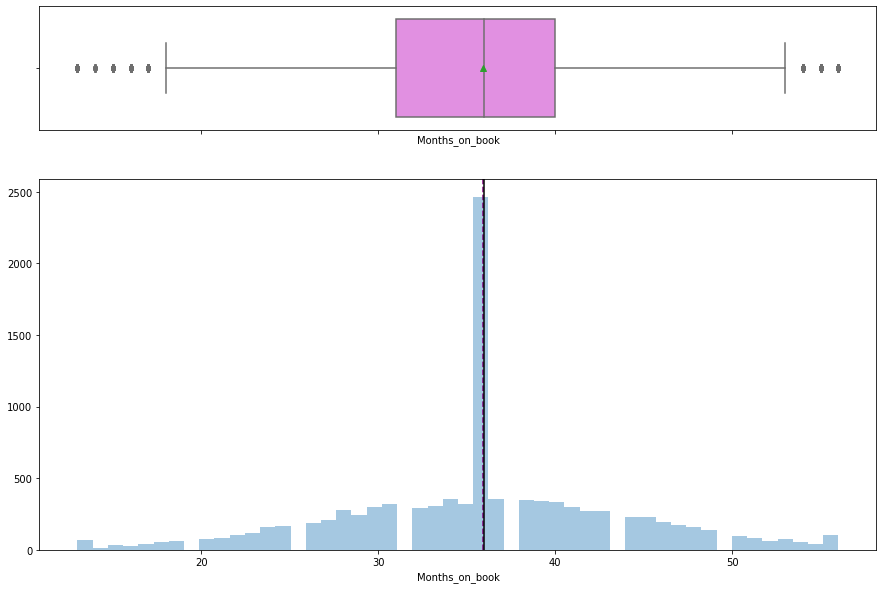

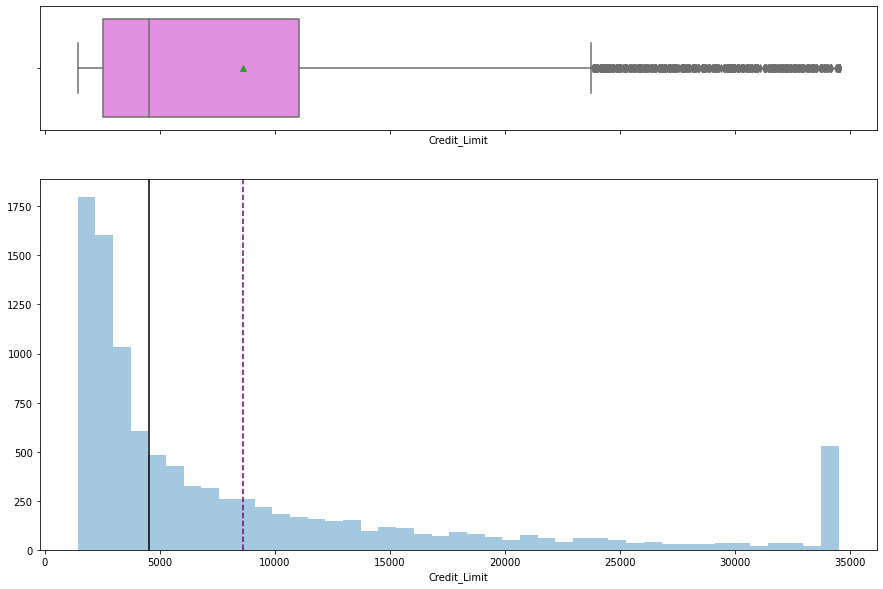

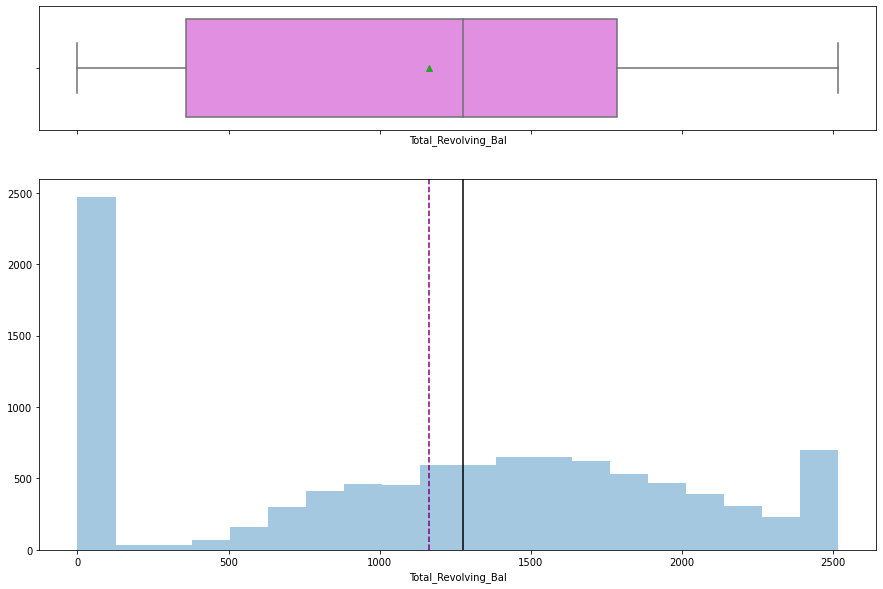

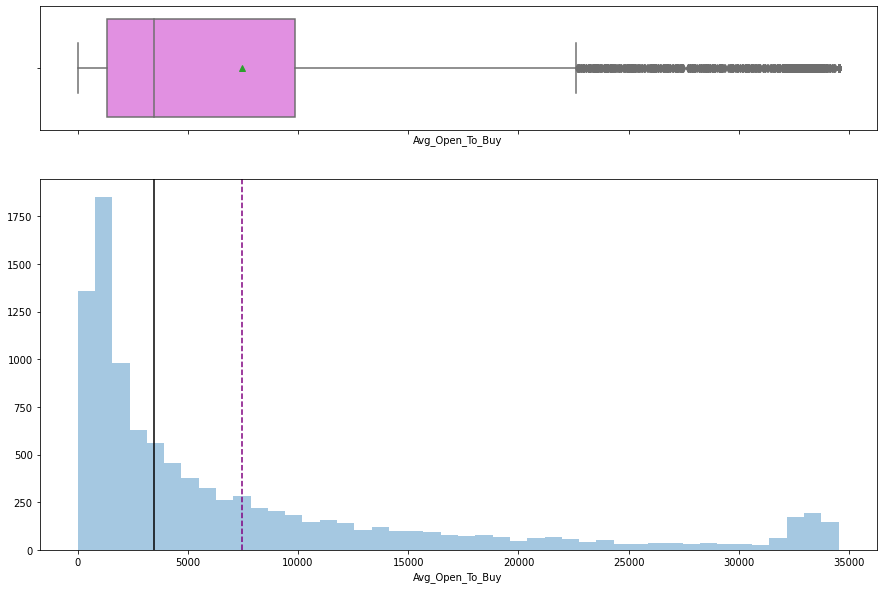

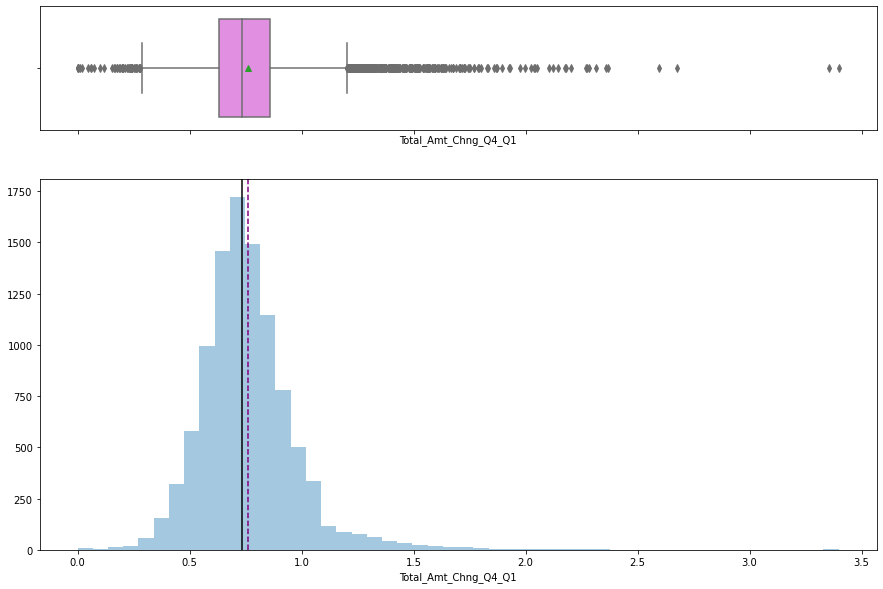

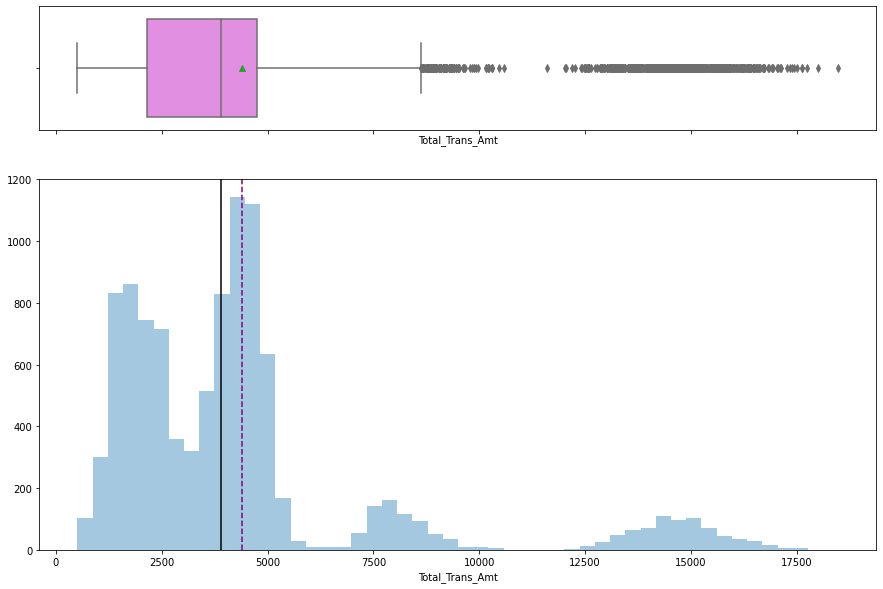

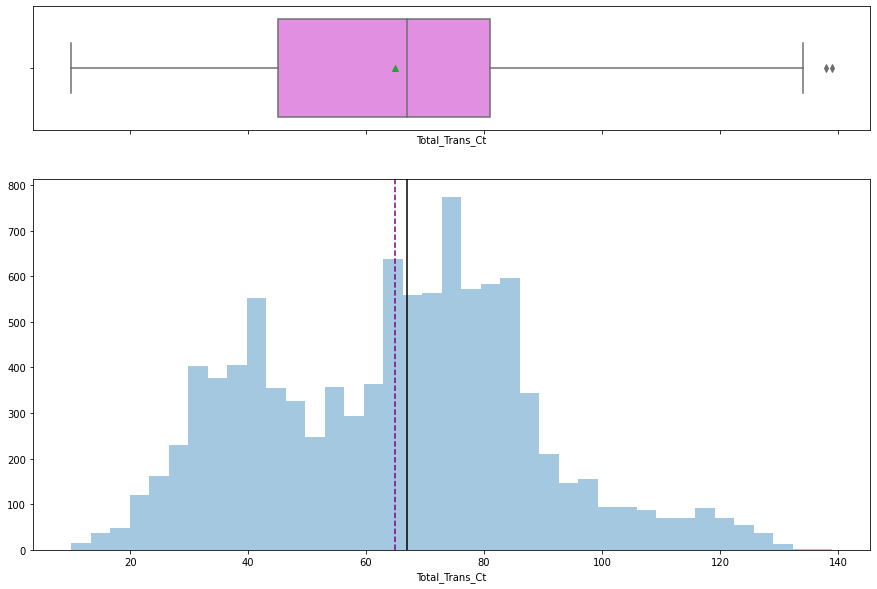

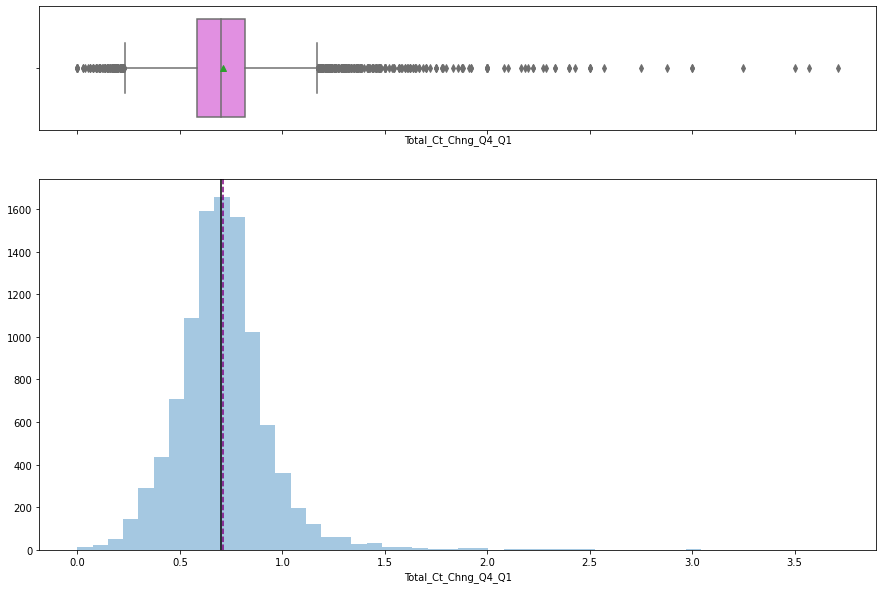

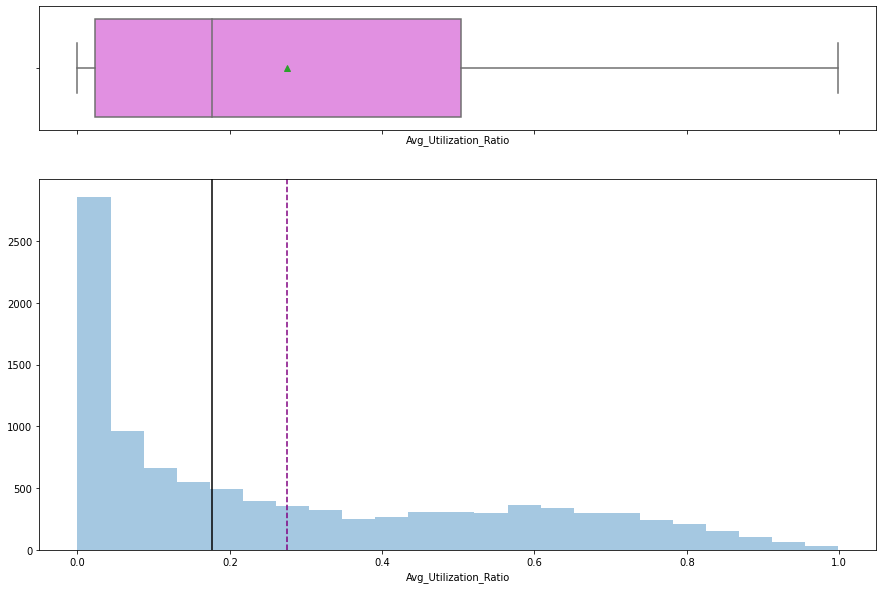

In [18]:
for _ in continuous_cols:
    histogram_boxplot(continuous_df[_])

In [19]:
continuous_cols.append('Attrition_Flag')
print(continuous_cols)

['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']


In [20]:
#continuous_cols.remove('Attrition_Flag')

In [21]:
#This works afte matplotlib update
#sns.pairplot(bk_cnr_df[continuous_cols], hue='Attrition_Flag')

In [22]:
continuous_df = pd.concat([bk_cnr_df['Attrition_Flag'],continuous_df], axis=1)

In [23]:
continuous_df.head()

,Attrition_Flag,CLIENTNUM,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,768805383,45,39,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,818770008,49,44,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,713982108,51,36,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,769911858,40,34,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,709106358,40,21,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
continuous_cols.remove('Attrition_Flag')

In [25]:
continuous_cols.remove('CLIENTNUM')

In [26]:
continuous_cols

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

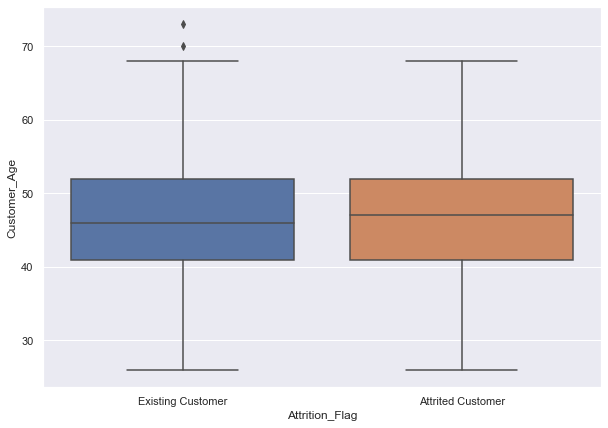

In [27]:
#'Customer_Age'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Customer_Age', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

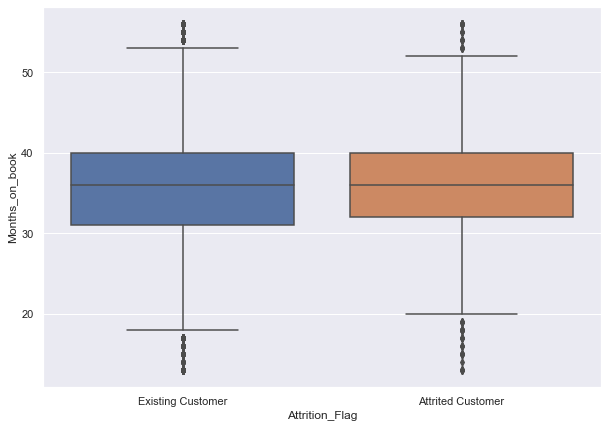

In [28]:
#'Months_on_book'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Months_on_book', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

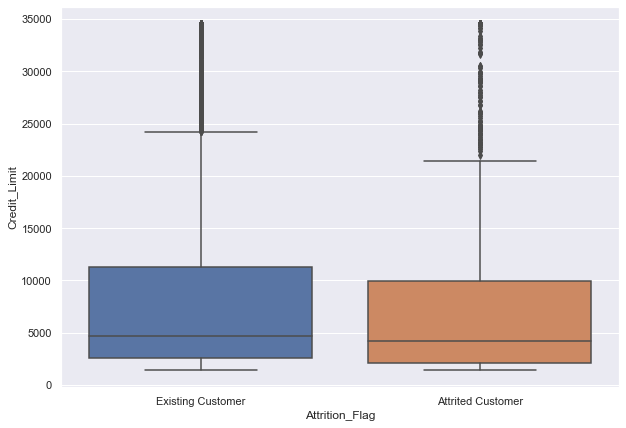

In [29]:
# 'Credit_Limit'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y= 'Credit_Limit', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

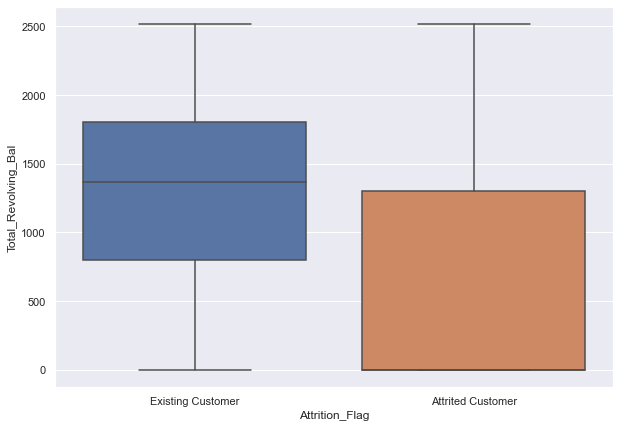

In [30]:
#'Total_Revolving_Bal' - this may be misleading to the model as it is a result of attrition flag
# not a explanatory variable
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Total_Revolving_Bal', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

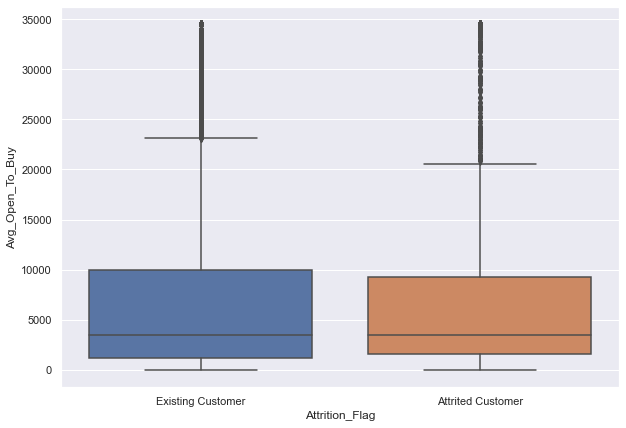

In [31]:
#'Avg_Open_To_Buy'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Avg_Open_To_Buy', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

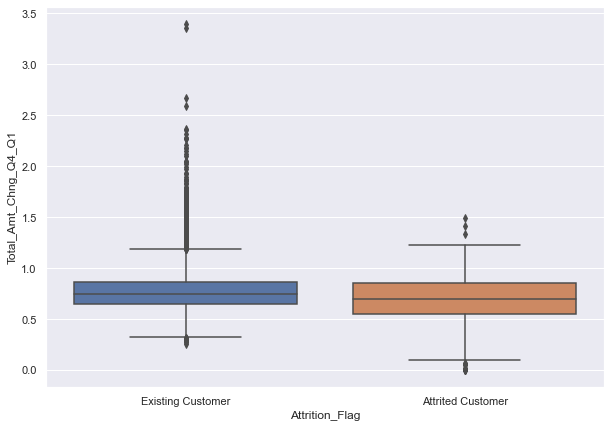

In [32]:
#'Total_Amt_Chng_Q4_Q1'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Total_Amt_Chng_Q4_Q1', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

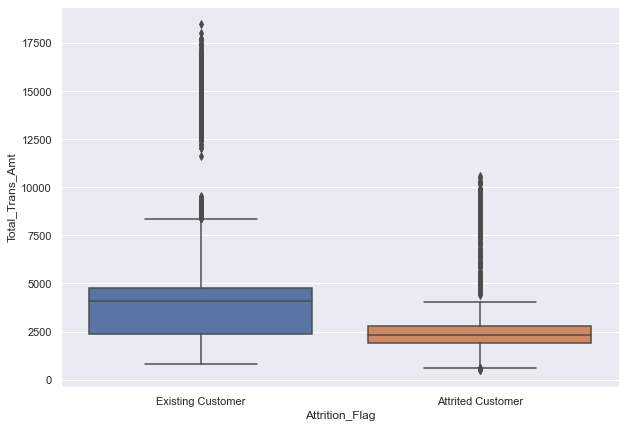

In [33]:
# 'Total_Trans_Amt'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y='Total_Trans_Amt', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

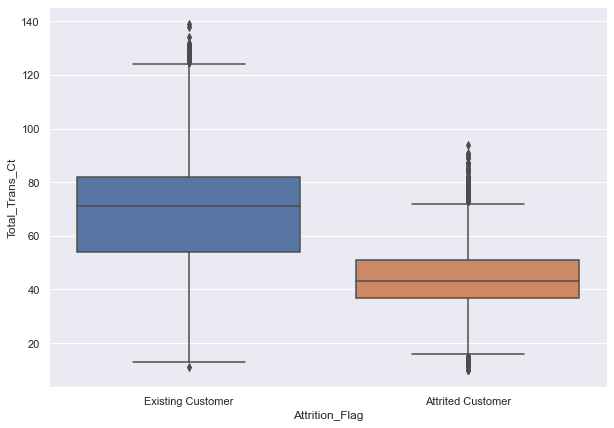

In [34]:
#  'Total_Trans_Ct'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y= 'Total_Trans_Ct', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

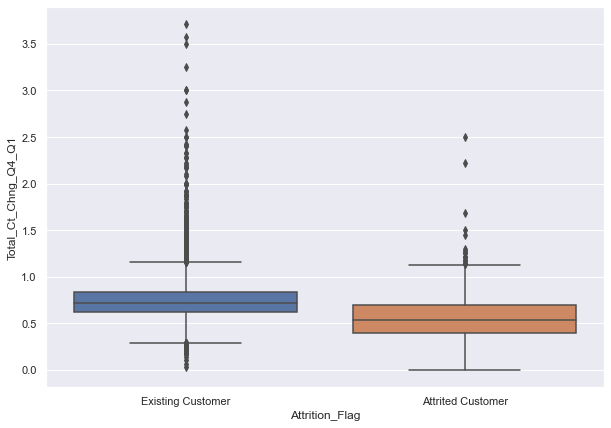

In [35]:
#  'Total_Ct_Chng_Q4_Q1'
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y= 'Total_Ct_Chng_Q4_Q1', data=continuous_df, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

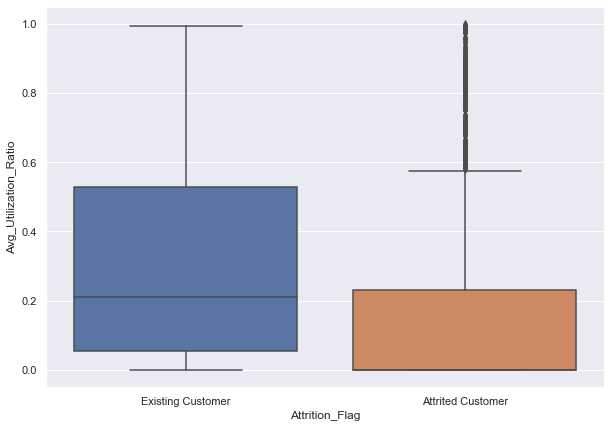

In [36]:
#   'Avg_Utilization_Ratio' this is a result of attrition not a explanatory variable
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y=  'Avg_Utilization_Ratio', data=continuous_df, orient="vertical")

In [37]:
#remove variables that are confounding or not explanatory
bk_cnr_df = bk_cnr_df.drop('CLIENTNUM', axis=1)
bk_cnr_df = bk_cnr_df.drop('Total_Revolving_Bal',axis=1)
bk_cnr_df = bk_cnr_df.drop('Avg_Utilization_Ratio',axis=1)
bk_cnr_df = bk_cnr_df.drop('Months_on_book',axis=1)
bk_cnr_df = bk_cnr_df.drop('Avg_Open_To_Buy',axis=1)

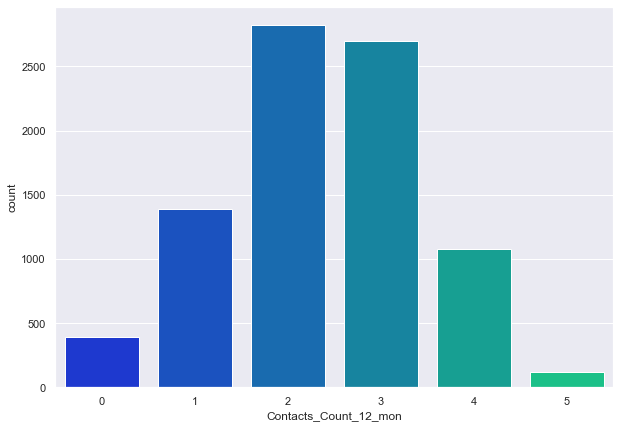

In [38]:
#CONTACTS COUNT
ax= sns.countplot(df_existing[disc[0]], palette='winter')

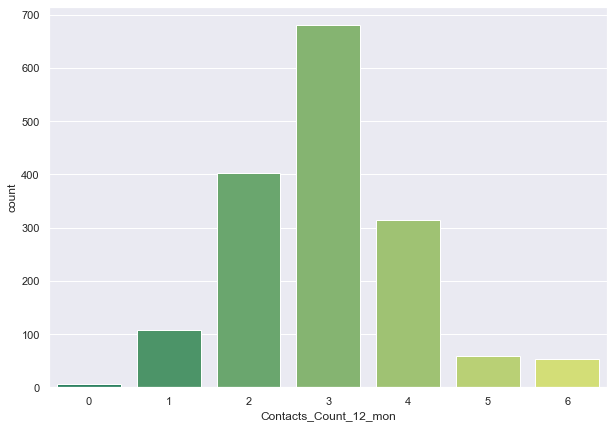

In [39]:
ax= sns.countplot(df_attrited[disc[0]], palette='summer')

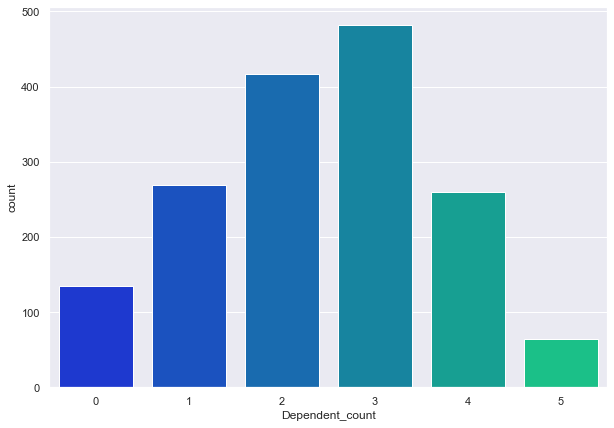

In [40]:
#DEPENDENT COUNT
ax= sns.countplot(df_attrited[disc[1]], palette='winter')

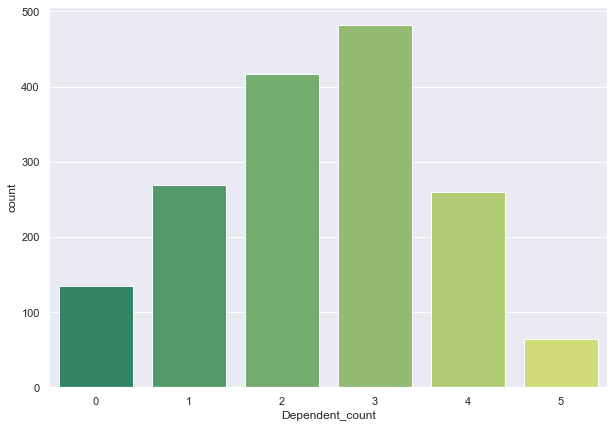

In [41]:
ax= sns.countplot(df_attrited[disc[1]], palette='summer')

In [42]:
#DEPENDENT COUNT DOES NOT APPEAR TO BE A FACTOR!
bk_cnr_df=bk_cnr_df.drop('Dependent_count', axis=1)
bk_cnr_df.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1144,42,1.625
1,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,1.541,1291,33,3.714
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,2.594,1887,20,2.333
3,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,1.405,1171,20,2.333
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,2.175,816,28,2.500


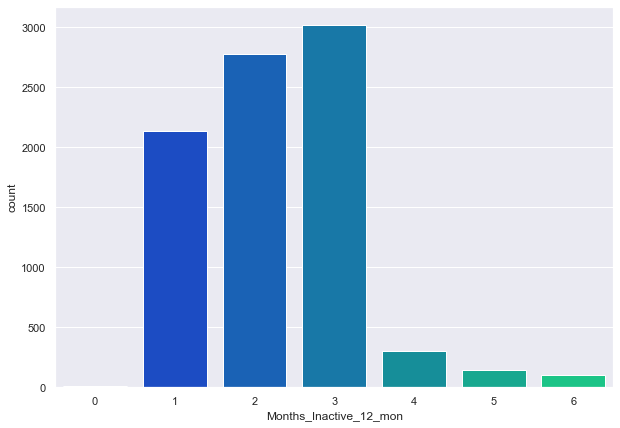

In [43]:
#Months_Inactive_12_mon
ax= sns.countplot(df_existing[disc[2]], palette='winter')

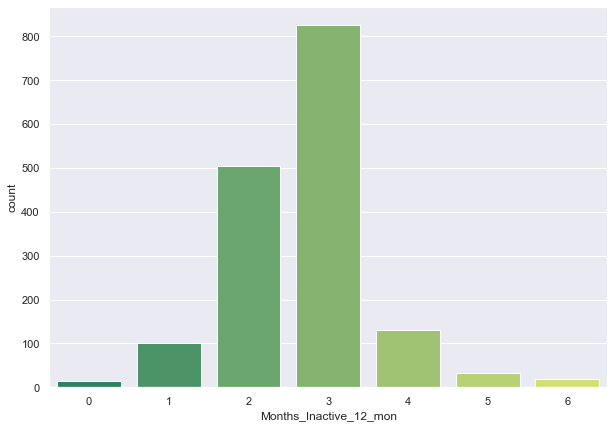

In [44]:
ax= sns.countplot(df_attrited[disc[2]], palette='summer')

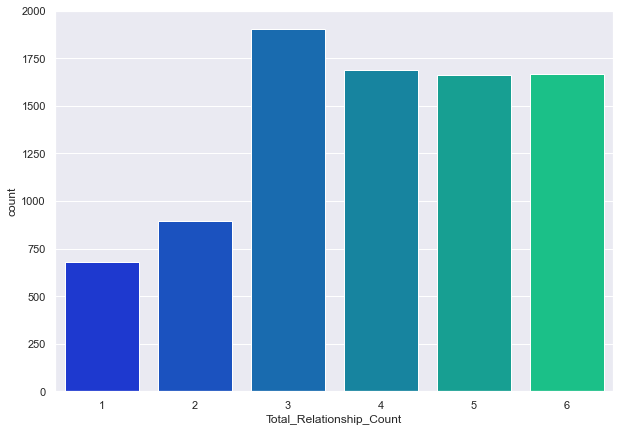

In [45]:
#Total Relationship Count
ax= sns.countplot(df_existing[disc[3]], palette='winter')

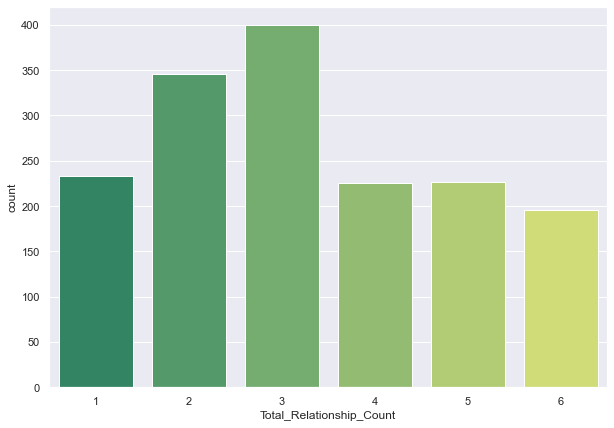

In [46]:
ax= sns.countplot(df_attrited[disc[3]], palette='summer')

In [47]:
## Function to plot stacked bar chart
def stacked_plot(data, x, response):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data[response], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data[response], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


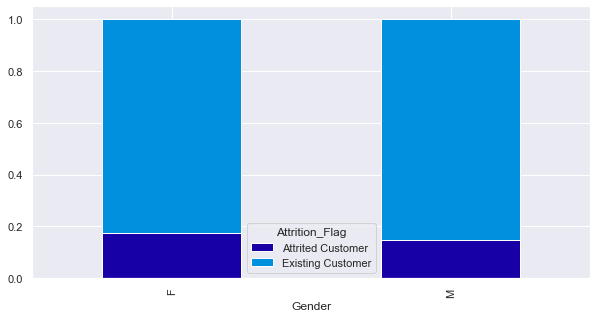

In [48]:
#Gender
stacked_plot(bk_cnr_df, bk_cnr_df[object_cols[1]],'Attrition_Flag')

In [49]:
#Gender is not a factor so it is dropped
bk_cnr_df = bk_cnr_df.drop('Gender', axis=1)

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


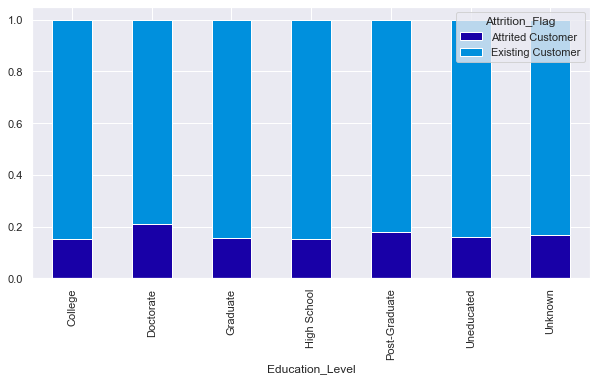

In [50]:
#EDUCAITON LEVEL
stacked_plot(bk_cnr_df, bk_cnr_df[object_cols[2]],'Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


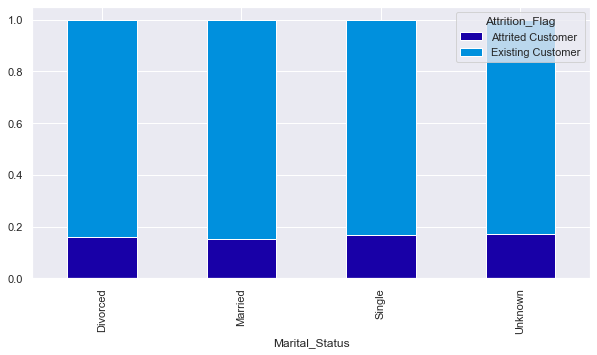

In [51]:
#Marital Staus 
stacked_plot(bk_cnr_df, bk_cnr_df[object_cols[3]],'Attrition_Flag')

In [52]:
#Marital status doesn't appear to be a factor by symmetry of the above plot
bk_cnr_df = bk_cnr_df.drop('Marital_Status', axis=1)

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


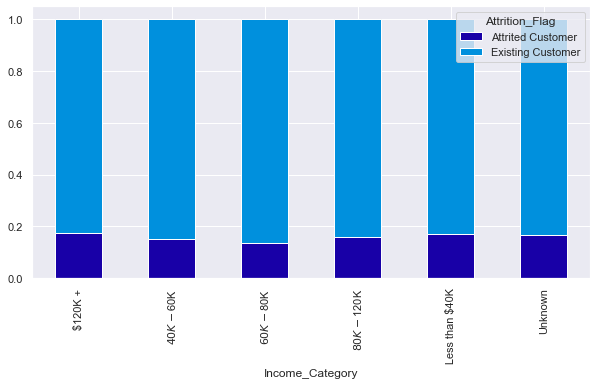

In [53]:
#Income
stacked_plot(bk_cnr_df, bk_cnr_df[object_cols[4]],'Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


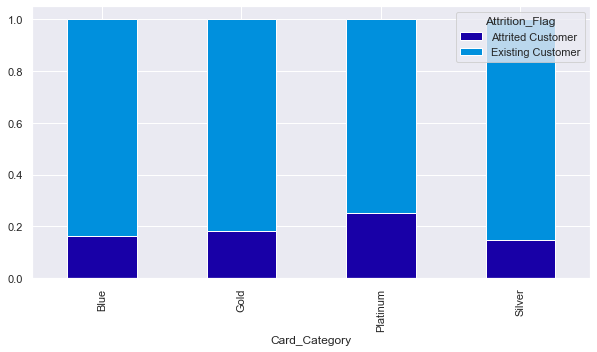

In [54]:
#Card_Category
stacked_plot(bk_cnr_df, bk_cnr_df[object_cols[5]],'Attrition_Flag')

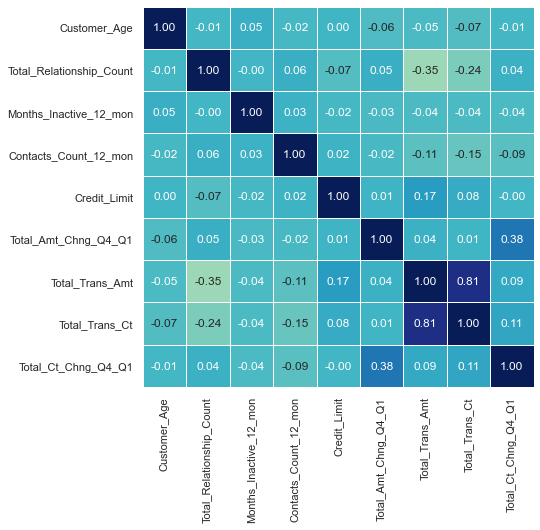

In [55]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    bk_cnr_df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

In [56]:
#to prevent double dipping we remove Total_Trans_Ammt and Keep Total_Trans_Ct
bk_cnr_df = bk_cnr_df.drop('Total_Trans_Amt', axis=1)

In [57]:
#NOTE TO SELF: REMOVE OUTLIERS
description=bk_cnr_df.describe()
description.describe()#.loc['75%']["Customer_Age"]

,Customer_Age,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1302.417847,1268.920874,1267.918974,1267.945193,10246.691294,1266.700268,1319.666408,1266.720789
std,3565.719871,3579.204850,3579.609722,3579.599123,10439.274058,3580.101880,3558.916914,3580.093622
min,8.016814,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.000000
25%,37.250000,2.638602,1.752656,1.776556,4050.500000,0.528052,39.618143,0.496022
50%,46.162980,3.906290,2.170584,2.227659,8860.365174,0.747970,65.929347,0.707111
75%,57.250000,5.250000,3.750000,3.750000,10362.125000,1.493500,95.500000,1.542000
max,10127.000000,10127.000000,10127.000000,10127.000000,34516.000000,10127.000000,10127.000000,10127.000000


In [58]:
#compile list of outlier columns from the continuous kept
bk_cnr_ols = []
for continuous_col in continuous_cols:
    #print(continuous_col)
    if continuous_col in list(bk_cnr_df.columns):
        bk_cnr_ols.append(continuous_col)
print(bk_cnr_ols)

['Customer_Age', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [59]:
seventy_fifth = []
for col in bk_cnr_ols:
    seventy_fifth.append(description.loc['75%'][col])
print(seventy_fifth)

[52.0, 11067.5, 0.8590000000000001, 81.0, 0.818]


In [60]:
twenty_fifth = []
for col in bk_cnr_ols:
    twenty_fifth.append(description.loc['25%'][col])
print(twenty_fifth)

[41.0, 2555.0, 0.631, 45.0, 0.5820000000000001]


In [61]:
#CALCULATE THE OUTLIER CUTOFFS
cutoffs, upperco, lowerco =[],[],[]
for i in range(len(seventy_fifth)): cutoffs.append( (seventy_fifth[i] - twenty_fifth[i])*1.5 ) 
for i in range(len(seventy_fifth)): upperco.append( seventy_fifth[i] + cutoffs[i] ) 
for i in range(len(seventy_fifth)): lowerco.append( twenty_fifth[i] - cutoffs[i] ) 

In [62]:
print("Outliers fall below:")

print(lowerco)
print("Outliers extend above:")
print(upperco)

print(bk_cnr_ols)

Outliers fall below:
[24.5, -10213.75, 0.28899999999999987, -9.0, 0.22800000000000026]
Outliers extend above:
[68.5, 23836.25, 1.2010000000000003, 135.0, 1.1719999999999997]
['Customer_Age', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [63]:
bk_cnr_df[bk_cnr_ols].describe()

,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,0.759941,64.858695,0.712222
std,8.016814,9088.776650,0.219207,23.472570,0.238086
min,26.000000,1438.300000,0.000000,10.000000,0.000000
25%,41.000000,2555.000000,0.631000,45.000000,0.582000
50%,46.000000,4549.000000,0.736000,67.000000,0.702000
75%,52.000000,11067.500000,0.859000,81.000000,0.818000
max,73.000000,34516.000000,3.397000,139.000000,3.714000


In [64]:
for i in range(len(bk_cnr_ols)):
    print(bk_cnr_ols[i])
    print("lower"+str(lowerco[i])+" min"+str(bk_cnr_df[bk_cnr_ols].min()[i])+" uppeer"+str(upperco[i])+"max"+str(bk_cnr_df[bk_cnr_ols].max()[i]))

Customer_Age
lower24.5 min26.0 uppeer68.5max73.0
Credit_Limit
lower-10213.75 min1438.3 uppeer23836.25max34516.0
Total_Amt_Chng_Q4_Q1
lower0.28899999999999987 min0.0 uppeer1.2010000000000003max3.397
Total_Trans_Ct
lower-9.0 min10.0 uppeer135.0max139.0
Total_Ct_Chng_Q4_Q1
lower0.22800000000000026 min0.0 uppeer1.1719999999999997max3.714


In [65]:
#Customer age has upper outliers
#Credit Limit Has Upper outliers
#Total Amt Chng Q4Q1 has Lower and Upper
#Total Trans Ct has Upper outliers
#Total CT Chg has upper and lower

In [66]:
wout_ca_ols, ca_ols = [x for _, x in bk_cnr_df.groupby(bk_cnr_df['Customer_Age'] > upperco[0])]
wout_cl_ols, cl_ols = [x for _, x in wout_ca_ols.groupby(wout_ca_ols['Credit_Limit'] > upperco[1])]
wout_tacqq_ols, tacqq_olsu =[x for _, x in wout_cl_ols.groupby(wout_cl_ols['Total_Amt_Chng_Q4_Q1'] > upperco[2])]
wout_tacqq_ols, tacqq_olsl =[x for _, x in wout_tacqq_ols.groupby(wout_tacqq_ols["Total_Amt_Chng_Q4_Q1"] < lowerco[2])]
wout_tc_ols, tc_ols = [x for _, x in wout_tacqq_ols.groupby(wout_tacqq_ols['Total_Trans_Ct'] > upperco[3])]
wout_cc_ols, cc_olsl = [x for _, x in wout_tc_ols.groupby(wout_tc_ols['Total_Ct_Chng_Q4_Q1'] < lowerco[4])]
wout_ols, cc_olsu = [x for _, x in wout_cc_ols.groupby(wout_cc_ols['Total_Ct_Chng_Q4_Q1'] > upperco[4])]

In [67]:
wout_ols[bk_cnr_ols].describe()

,Customer_Age,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,8519.000000,8519.000000,8519.00000,8519.000000,8519.000000
mean,46.342646,6130.098591,0.73606,65.985914,0.691221
std,8.057020,5216.999474,0.16197,22.587417,0.175642
min,26.000000,1438.300000,0.28900,10.000000,0.231000
25%,41.000000,2426.500000,0.62800,47.000000,0.580000
50%,46.000000,3877.000000,0.72900,69.000000,0.694000
75%,52.000000,8312.500000,0.84200,81.000000,0.806000
max,68.000000,23760.000000,1.20100,131.000000,1.171000


In [68]:
#Encoding Categorical Variables
# Encoding variables - Saving accounts and Checking account.
wout_ols["Education_Level"] = wout_ols["Education_Level"].map(
    {"Unknown": np.nan, "Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate":4, "Doctorate": 5 }
)

wout_ols["Income_Category"] = wout_ols["Income_Category"].map(
    {"Unknown": np.nan, "Less than $40K": 0, "40K - 60K":1,"60K - 80K":2, "80K - 120K":3,"$120K+":4 }
)

wout_ols["Card_Category"] = wout_ols["Card_Category"].map(
    {"Blue":1, "Silver":2, "Gold":3, "Platinum":4 }
)

In [69]:
wout_ols["Attrition_Flag"] = wout_ols["Attrition_Flag"].map(
    {"Attrited Customer":1, "Existing Customer":0 }
)

In [70]:
#Checking for missing (null) values
wout_ols.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Education_Level             1274
Income_Category             5158
Card_Category                  0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
dtype: int64

In [71]:
X = wout_ols.drop(["Attrition_Flag"],axis=1)
y = wout_ols["Attrition_Flag"]

In [72]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(5963, 11) (2556, 11)


In [73]:
# Creating a list of columns with missing values
reqd_col_for_impute = ["Education_Level", "Income_Category"]

In [74]:
imputer = KNNImputer(n_neighbors=5)

In [75]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

# As KNNImputer replaces the missing value with the mean of K nearest neighbours, we will roundoff those values
X_train[reqd_col_for_impute] = np.round(X_train[reqd_col_for_impute])
X_test[reqd_col_for_impute] = np.round(X_test[reqd_col_for_impute])

In [76]:
#Checking for missing (null) values
X_train.isna().sum()

Customer_Age                0
Education_Level             0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

In [77]:
X_test.isna().sum()

Customer_Age                0
Education_Level             0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

In [78]:
# Creating ONE HOT ENCODED VERSIONS OF ALL DISCRETE/CATEGORICAL VARIABLES 
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [79]:
#Using similar Decision Tree from the Tree sublibray of Sk Learn
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#same as before
dTree.fit(X_train, y_train)
dTreePreds = dTree.predict(X_test)
accuracy_dt = accuracy_score(y_test, dTreePreds)
# Accuracy seems to be 1 - Mean Absolute Error which was 0.02
print("Accuracy:"+str(accuracy_dt))

Accuracy:0.8767605633802817


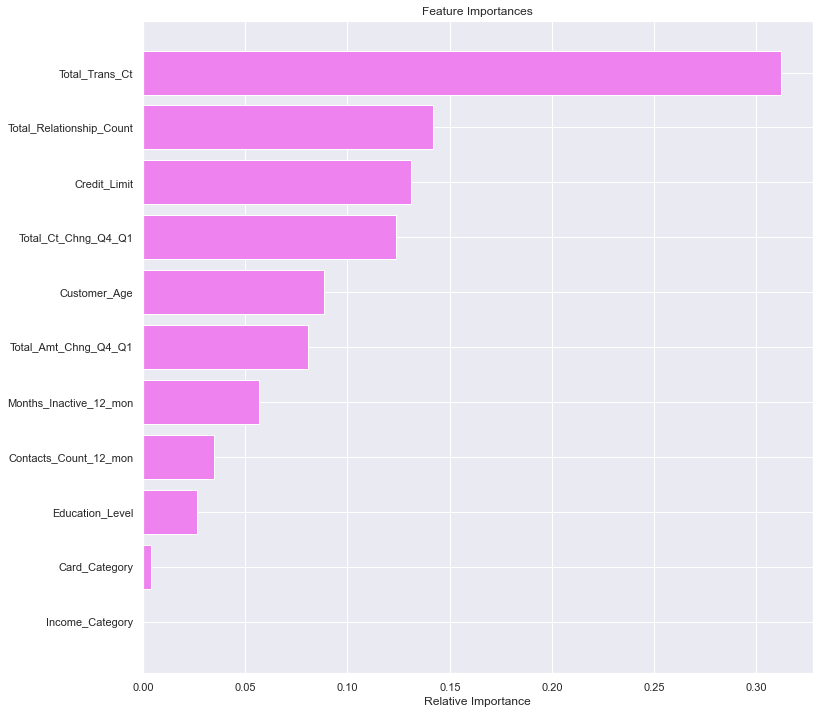

In [80]:
column_names = list(X.columns)
feature_names = column_names

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

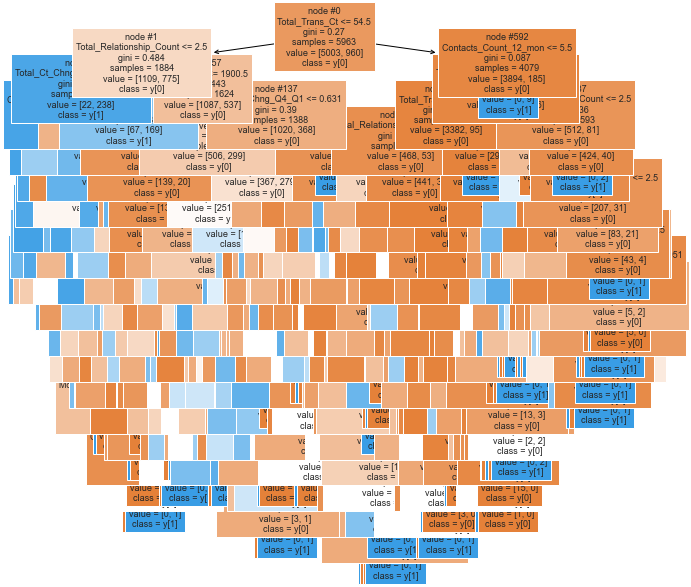

In [113]:
#ADD TREE DISPLAY
plt.figure(figsize=(10,10))

out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [81]:
#Logistic Regression
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 960
Before UpSampling, counts of label '0': 5003 

After UpSampling, counts of label '1': 5003
After UpSampling, counts of label '0': 5003 

After UpSampling, the shape of train_X: (10006, 11)
After UpSampling, the shape of train_y: (10006,) 



In [82]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8740219092331768


In [83]:
#Up Sampling
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.7805164319248826


In [84]:
wout_ols['Attrition_Flag'].head()

10    0
14    0
19    0
20    0
21    1
Name: Attrition_Flag, dtype: int64

In [85]:
#Down Sampling
existing_indices = wout_ols[wout_ols['Attrition_Flag'] == 0].index   # Get no. exsiting customers
no_existing = len(wout_ols[wout_ols['Attrition_Flag'] == 0])         
print(no_existing)

attrited_indices = wout_ols[wout_ols['Attrition_Flag'] == 1].index        # Get no. attrited customers
no_attrited = len(wout_ols[wout_ols['Attrition_Flag'] == 1])                
print(no_attrited)

7147
1372


In [86]:
random_indices = np.random.choice( existing_indices, no_existing - 200 , replace=False)

In [87]:
down_sample_indices = np.concatenate([existing_indices,random_indices])

In [88]:
bkcnr_df_down_sample = wout_ols.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
bkcnr_df_down_sample.shape
bkcnr_df_down_sample.groupby(["Attrition_Flag"]).count() 

,Customer_Age,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Attrition_Flag,,,,,,,,,,,
0,14094,12000,5491,14094,14094,14094,14094,14094,14094,14094,14094


In [89]:
bkcnr_df_down_sample=bkcnr_df_down_sample.dropna() 
#this is an attempt to get an output, still debuging where the nulls come from

In [90]:
array = bkcnr_df_down_sample.values
X_lr = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y_lr = array[:,1]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, Y_lr, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [91]:
print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

After DownSampling, the shape of X_train: (5963, 11)
After DownSampling, the shape of X_test: (2556, 11) 



In [92]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8740219092331768


In [93]:
#RANDOM FORREST
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)
rfPreds = rf_estimator.predict(X_test)
#Calculating different metrics
#get_metrics_score(rf_estimator)

accuracy_rfr = accuracy_score(y_test, rfPreds)
# Accuracy seems to be 1 - Mean Absolute Error
print("Accuracy:"+str(accuracy_rfr))

#Creating confusion matrix
#make_confusion_matrix(rf_estimator,y_test)

Accuracy:0.92018779342723


In [94]:
#ADA BOOST
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
abcPreds = abc.predict(X_test)
accuracy_abc = accuracy_score(y_test, abcPreds)
print("Accuracy:"+str(accuracy_abc))

Accuracy:0.9025821596244131


In [95]:
#XGB XG Boost
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgbPreds = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgbPreds)
print("Accuracy:"+str(accuracy_xgb))

[18:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:0.9135367762128326


In [98]:
#Gradient Boost Model
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)
gbPreds = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, gbPreds)
print("Accuracy:"+str(accuracy_gb))

Accuracy:0.9151017214397497


In [99]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [100]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [101]:
#DECISION TREE HYPER PARAMETER TUNING
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2} 
Score: 0.6239583333333334


In [102]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=4),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=4, random_state=1))])

Accuracy on training set :  0.9909441556263626
Accuracy on test set :  0.878716744913928
Recall on training set :  0.959375
Recall on test set :  0.616504854368932
Precision on training set :  0.9839743589743589
Precision on test set :  0.625615763546798


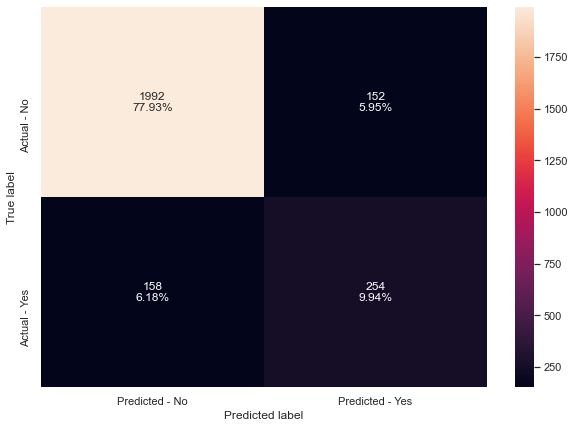

In [103]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)
# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

In [104]:
#XGBOOST HYPER PARAMETER TUNING
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.9083333333333334:


Accuracy on training set :  0.9864583333333333
Accuracy on test set :  0.8883495145631068
Recall on training set :  0.9864583333333333
Recall on test set :  0.8883495145631068
Precision on training set :  0.5186199342825849
Precision on test set :  0.47164948453608246


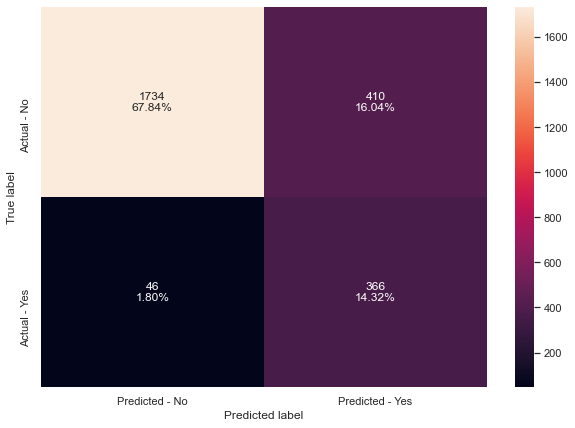

In [107]:
# Calculating different metrics
get_metrics_score(grid_cv)

# Creating confusion matrix
make_confusion_matrix(grid_cv, y_test)